In [111]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import platform
import random
from collections import (OrderedDict)
import jupyter_client
import jupyterlab
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import scipy
import seaborn as sns
from IPython.display import display
from notebook import __version__ as nb_ver

np.set_printoptions(
  precision=60, threshold=20, edgeitems=8, suppress=True, linewidth=999, sign=' ', floatmode='maxprec_equal'
)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 3)
pd.set_option('display.html.border', 0)
pd.set_option('mode.chained_assignment', 'raise')
pd.set_option('display.colheader_justify', 'center')

plt.rcParams['agg.path.chunksize'] = 10000
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = 16.0, 10.0
plt.rcParams['figure.titleweight'] = 'bold'
plt.rcParams['image.interpolation'] = 'None'
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['savefig.bbox'] = 'tight'

sns.set()
sns.set(font_scale=0.8)
plt.style.use("dark_background")
sns.set_context(rc={'patch.linewidth': 0.0})
sns.set_style({
  'axes.axisbelow': False,
  'grid.color': '#ccc',
  'grid.alpha': 0.33,
  'grid.linestyle': '--',
  'grid.linewidth': 0.5,
  'axes.facecolor': '#111',
  'axes.edgecolor': '#ccc',
  'axes.grid': True,
  'axes.labelcolor': '#ccc',
  'figure.facecolor': '#111',
  'text.color': '#ccc',
  'xtick.color': '#ccc',
  'ytick.color': '#ccc',
  'patch.edgecolor': '#ccc',
})
sns.set_palette("pastel")

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.alpha'] = 0.33
plt.rcParams['grid.color'] = '#ccc'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Fixed random seed for better reproducibility
SEED = 4146516932
random.seed(SEED)
np.random.seed(SEED)

versions = pd.DataFrame.from_dict(OrderedDict([
  ('Operating system', ' '.join([platform.system(), platform.processor()])),
  ('Python', platform.python_version()),
  ('Jupyter', jupyter_client.__version__),
  ('Jupyter Notebook', nb_ver),
  ('Jupyter Lab', jupyterlab.__version__),
  ('Matplotlib', matplotlib.__version__),
  ('Seaborn', sns.__version__),
  ('Numpy', np.__version__),
  ('Pandas', pd.__version__),
  ('Plotly', plotly.__version__),
  ('SciPy', scipy.__version__),
]), orient='index')
versions.columns = ['Version']
display(versions)

,Version
Operating system,Linux x86_64
Python,3.12.7
Jupyter,7.4.9
Jupyter Notebook,6.5.7
Jupyter Lab,4.3.1
Matplotlib,3.9.2
Seaborn,0.13.2
Numpy,2.1.3
Pandas,2.2.3
Plotly,5.24.1


In [112]:
from scipy.interpolate import interp1d
from scipy import signal
import numpy as np

t = np.linspace(-10, 10, 1000)


def convolve(t1, y1, t2, y2, dt=0.1):
  t_min = min(min(t1), min(t2))
  t_max = max(max(t1), max(t2))
  t_new = np.arange(t_min, t_max + dt, dt)

  interp_y1 = interp1d(t1, y1, bounds_error=False, fill_value=0)
  interp_y2 = interp1d(t2, y2, bounds_error=False, fill_value=0)

  y1_new = interp_y1(t_new)
  y2_new = interp_y2(t_new)

  y_conv = signal.convolve(y1_new, y2_new, mode='full') * dt
  t_conv = np.linspace(2 * t_min, 2 * t_max, len(y_conv))

  plt.figure(figsize=(10, 5))
  plt.plot(t1, y1, label='Signal 1')
  plt.plot(t2, y2, label='Signal 2')
  plt.plot(t_conv, y_conv, linestyle='--', label='Convolution')
  plt.legend()

  return t_conv, y_conv, plt


def create_delta_function(t, t0, A=1):
  idx = np.abs(t - t0).argmin()
  delta = signal.unit_impulse(len(t), idx=idx) * A
  return delta


def create_rectangular_signal(t, t0, t1, A=1):
  return np.where((t > t0) & (t < t1), A, 0)

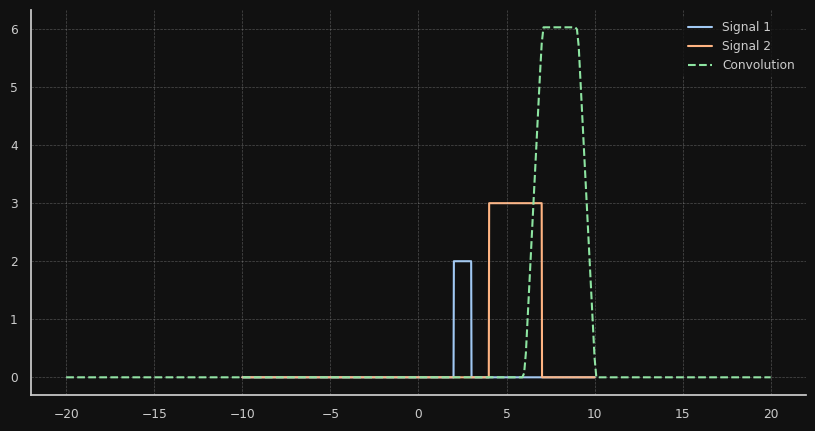

In [113]:
y1 = create_rectangular_signal(t, t0=2, t1=3, A=2)
y2 = create_rectangular_signal(t, t0=4, t1=7, A=3)

_, _, plt = convolve(t, y1, t, y2)

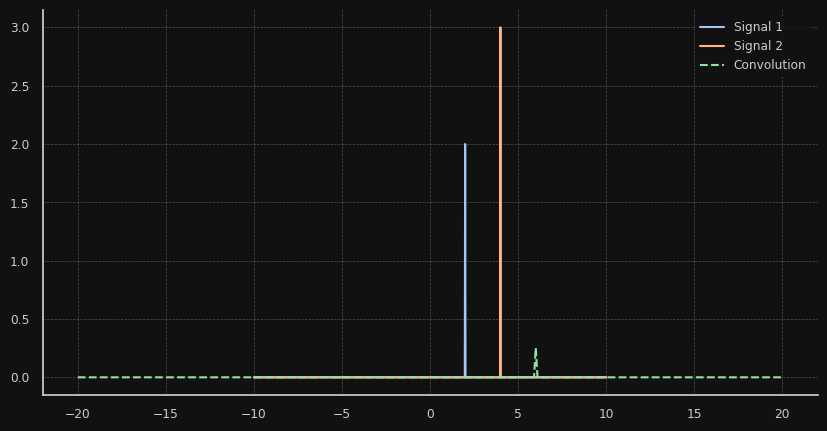

In [114]:


y1 = create_delta_function(t, t0=2, A=2)
y2 = create_delta_function(t, t0=4, A=3)

t_conv, y_conv, plt = convolve(t, y1, t, y2)


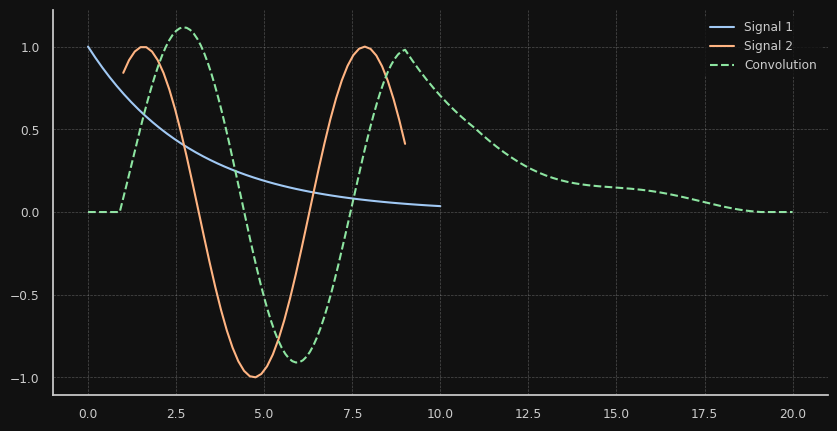

In [115]:
t1, y1 = np.linspace(0, 10, 50), np.exp(-np.linspace(0, 10, 50) / 3.0)
t2, y2 = np.linspace(1, 9, 50), np.sin(np.linspace(1, 9, 50))

_, _, plt = convolve(t1, y1, t2, y2)

In [122]:
from numpy import interp
import numpy as np
from scipy.interpolate import interp1d


def create_delta_function(x_pos, weight=1., min_width=1e-3):
  xvals = np.array([x_pos - min_width / 2, x_pos + min_width / 2])
  yvals = np.array([0.0, weight, weight, 0.0])
  return interp1d(xvals, yvals, kind='linear', fill_value=1e10, bounds_error=False, assume_sorted=True)



# Plot the delta function
plt.plot(t, y_values, label='Delta Function')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Delta Function Interpolation')
plt.legend()
plt.show()

ValueError: the x array must have exactly one dimension.